In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import json


In [ ]:
# files... 
# Path to your JSON file
file_path = 'Results/testHash.json'

# Load the JSON data
with open(file_path, 'r') as file:
    data = json.load(file)

In [16]:
# Extract labels and hash codes
labels = np.array(data["y_test"])
hash_codes = np.array(data["testHash"])


In [4]:

def generate_random_hash_codes(n_samples, n_labels, n_bits, intra_label_similarity=0.7):
    """
    Generate random hash codes with approximate clustering by label.

    Parameters:
    - n_samples (int): Total number of samples
    - n_labels (int): Number of unique labels
    - n_bits (int): Length of each hash code in bits
    - intra_label_similarity (float): Proportion of bits shared among samples with the same label.

    Returns:
    - hash_codes (ndarray): Generated hash codes, shape (n_samples, n_bits)
    - labels (ndarray): Labels for each sample, shape (n_samples,)
    """
    # Assign labels randomly for each sample
    labels = np.random.randint(0, n_labels, n_samples)

    # Initialize hash codes
    hash_codes = np.zeros((n_samples, n_bits), dtype=np.int8)

    for label in range(n_labels):
        # Generate a base hash code for each label
        base_code = np.random.randint(0, 2, n_bits)
        
        # Apply similarity within label group
        for i in range(n_samples):
            if labels[i] == label:
                code = base_code.copy()
                # Flip a subset of bits for variation
                flip_mask = np.random.rand(n_bits) > intra_label_similarity
                code[flip_mask] = 1 - code[flip_mask]  # Flip bits where flip_mask is True
                hash_codes[i] = code

    return hash_codes, labels

# Parameters
n_samples = 10000
n_labels = 10
n_bits = 32
intra_label_similarity = 0.7  # Adjusted to improve MAP slightly above random

# Generate hash codes and labels
hash_codes, labels = generate_random_hash_codes(n_samples, n_labels, n_bits, intra_label_similarity)


# TSNE, and Precision at Radius

In [ ]:

def plot_tsne_hash_codes(hash_codes, labels, n_components=2, perplexity=30, random_state=0):
  """
  Function to show hash codes in 2 dimensions.
  hash_codes = test hashes 
  n_components = dimensionality ( use 2 for scatter)
  perplexity = ? 

  """
  # Initialize t-SNE and transform the hash codes
  tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=random_state)
  hash_codes_2d = tsne.fit_transform(hash_codes)
    
  # Plot the 2D representation of hash codes with color based on labels
  plt.figure(figsize=(10, 8))
  scatter = plt.scatter(hash_codes_2d[:, 0], hash_codes_2d[:, 1], c=labels, cmap='tab10', s=10, alpha=0.7)
    
  # Add colorbar and labels for clarity
  plt.colorbar(scatter, label='Label')
  plt.title('t-SNE Visualization of Hash Codes')
  plt.xlabel('t-SNE Component 1')
  plt.ylabel('t-SNE Component 2')
  plt.show()

# Example usage (assuming hash_codes and labels are defined numpy arrays):
# plot_tsne_hash_codes(hash_codes, labels)


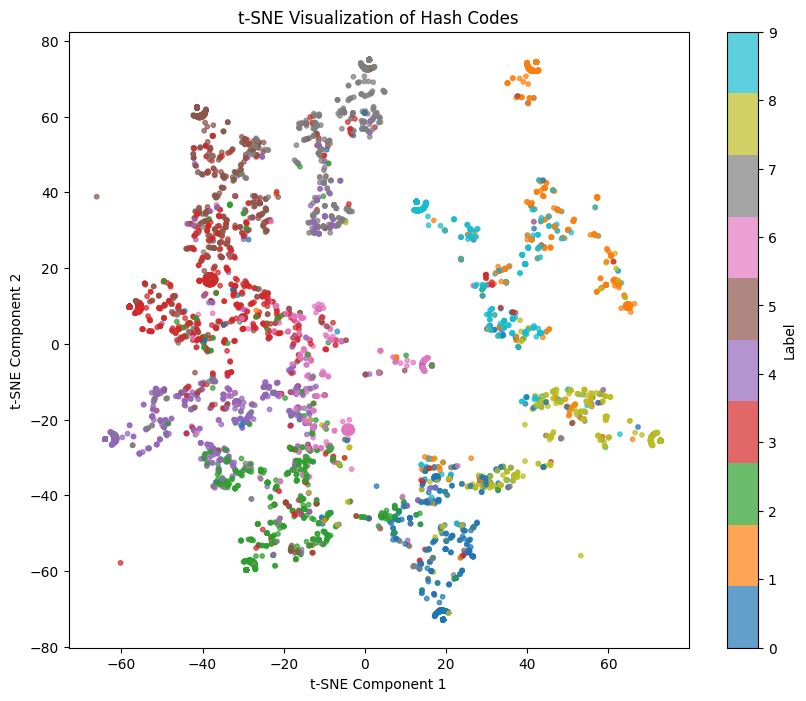

In [19]:
plot_tsne_hash_codes(hash_codes,labels)

In [3]:
import numpy as np
from sklearn.metrics import pairwise_distances

def precision_at_radius(test_hash_codes, train_hash_codes, test_labels, train_labels, radius=2):
    """
    Computes precision at a given Hamming radius.
    
    Parameters:
    - test_hash_codes: numpy array of shape (n_test_samples, n_bits), hash codes for test samples
    - train_hash_codes: numpy array of shape (n_train_samples, n_bits), hash codes for train samples
    - test_labels: numpy array of shape (n_test_samples,), labels for test samples
    - train_labels: numpy array of shape (n_train_samples,), labels for train samples
    - radius: int, the Hamming distance threshold to consider as a match
    
    Returns:
    - precision: float, the precision at the given radius
    """
    # Compute Hamming distance between each test and train hash code
    hamming_distances = pairwise_distances(test_hash_codes, train_hash_codes, metric='hamming') * test_hash_codes.shape[1]
    
    correct_retrievals = 0
    total_retrievals = 0
    
    for i in range(len(test_hash_codes)):
        # Get indices of all train samples within the given Hamming radius
        within_radius = np.where(hamming_distances[i] <= radius)[0]
        
        # Count the number of correct matches
        correct_matches = np.sum(train_labels[within_radius] == test_labels[i])
        
        # Update totals for precision calculation
        correct_retrievals += correct_matches
        total_retrievals += len(within_radius)
    
    precision = correct_retrievals / total_retrievals if total_retrievals > 0 else 0
    return precision

# Example usage
# precision = precision_at_radius(test_hash_codes, train_hash_codes, test_labels, train_labels, radius=2)
# print(f"Precision at radius {radius}: {precision:.4f}")
